<a href="https://colab.research.google.com/github/Amritha-S-20/Medical_insurance_premium_prediction/blob/main/med_insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # <center><u><b>MEDICAL INSURANCE PREMIUM PREDICTION </b></u></center>
## <u><center>Predicting yearly  medical cover cost</center></u>

###### <b> DATASET :</b>  [medical insurance dataset]( https://www.kaggle.com/tejashvi14/medical-insurance-premium-prediction)

### Aim
<p>To Create a model that predicts the yearly medical cover cost.
</p>

### Content
<p> The Dataset Contains Health Related Parameters Of The Customers such as whether they having so medical conditions or not and if they have gone through some surgeries or not and also their age, height and weight. We have nearly 1000 records.The Premium Price Is In INR(₹) Currency And Showcases Prices For A Whole Year.</p>

### Columns
* <b>Age                    :</b> Age of the customer
* <b>Diabetics              :</b> Whether The Person Has Abnormal BloodSugar Levels (0-no, 1-yes)
* <b>BloodPressureProblems  :</b> Whether The Person Has Abnormal Blood Pressure Levels(0-no, 1-yes)
* <b>AnyTransplants         :</b> Any Major Organ Transplants(0-no,1-yes)
* <b>AnyChronicDiseases     :</b> Whether Customer Suffers From Chronic Ailments Like Asthama, Etc(0-no, 1-yes)
* <b>Height                 :</b> Height Of Customer
* <b>Weight                 :</b> Weight Of Customer
* <b>KnownAllergies         :</b> Whether The Customer Has Any Known Allergies(0-no, 1-yes)
* <b>HistoryOfCancerInFamily :</b> Whether Any Blood Relative Of The Customer Has Had Any Form Of Cancer(0-no, 1-yes)
* <b>NumberOfMajorSurgeries :</b> The Number Of Major Surgeries That The Person Has Had
* <b>PremiumPrice           :</b> Yearly Premium Price

### Importing Packages

In [1]:
# basic Libraries
import numpy as np
import pandas as pd
# visulations libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Data pre-processing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Modelling Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#for checking Model accuracy
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

### Reading csv file


In [2]:
df = pd.read_csv('/content/drive/MyDrive/med_insurance_premium_prediction/Medicalpremium.csv') # reading the data in csv format
df.head(10) # for viewing first 10 data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
5,30,0,0,0,0,160,69,1,0,1,23000
6,33,0,0,0,0,150,54,0,0,0,21000
7,23,0,0,0,0,181,79,1,0,0,15000
8,48,1,0,0,0,169,74,1,0,0,23000
9,38,0,0,0,0,182,93,0,0,0,23000


### <B>EDA</B>


### Data Cleaning and Understanding

In [3]:
print(f'Our dataset has {df.shape[0]} Number of rows and {df.shape[1]} number of columns') # for printing the shape of our dataset

Our dataset has 986 Number of rows and 11 number of columns


In [4]:
df.columns # to understand the column heading

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


We can see our data are of type integer which means all the categorical features are already encoded.

In [6]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [7]:
df.isnull().sum() # for finding the null values

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

<b> There is no null value in the dataframe

The categorical data such as Diabetes, AnyTransplants, AnyChronicDiseases, known allergies, HistoryOfCancerInFamily are already encoded using label encoding so we dont want to do it again.

checking for the consistency of column

In [8]:
print(df['Age'].unique()) # for getting the unique value in the age column
print(df['Age'].unique().min()) # for finding the min value
print(df['Age'].unique().max()) # for finding the max value

[45 60 36 52 38 30 33 23 48 66 24 46 18 42 57 21 49 20 35 53 31 22 26 28
 64 50 44 58 43 25 54 63 61 41 55 19 40 32 27 34 59 29 47 39 37 51 56 62
 65]
18
66


The age lies between 18 and 66.

In [9]:
print(df['Height'].unique()) # for finding the unique values in Height column
print(df['Height'].unique().min())
print(df['Height'].unique().max())

[155 180 158 183 166 160 150 181 169 182 175 186 178 184 149 154 156 163
 151 172 162 153 168 152 161 157 147 173 179 165 174 185 177 164 148 170
 187 167 159 188 171 176 146 145]
145
188


The height lies between 145 and 188.

In [10]:
print(df['Weight'].unique()) # for getting the unique values in the weight column
print(df['Weight'].unique().min())
print(df['Weight'].unique().max())

[ 57  73  59  93  88  69  54  79  74  67  97  76  68  82  61  81  92  83
  58  96  91  85  55  78  56  77  63  75  72  70  80  60  53  94  84  87
  64  95  66  62  86  90  65 116 118 110 121  98 104  89  71 106  99 119
 107 129 109 100 127 132 120 128 114 123 111 103 126 102 105 124 122  52
  51 101]
51
132


The values of Weight column lies between 51 and 132

In [11]:
print(df['PremiumPrice'].unique()) # for getting all the unique value in the premium price column
print(df['PremiumPrice'].unique().min())
print(df['PremiumPrice'].unique().max())

[25000 29000 23000 28000 21000 15000 35000 30000 32000 19000 24000 38000
 31000 26000 39000 22000 40000 18000 34000 20000 16000 36000 27000 17000]
15000
40000


The values in the Premium price column lies between 15000 and 40000
<p> Since all the other columns except no of major surgery are having values 0 and 1 and no of major surgery is having values 0,1,2 and 3 no need to check that again.

### <B>Data Visualization</B>

In [12]:
#creating a function for plotting the box plot
def mybarplot(bartitle=None,xvalue=None,yvalue=None,huevalue=None,bdata=None):
  print('\n')
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(x=xvalue,y=yvalue,hue=huevalue,data=bdata).set(title=bartitle)
  plt.show()

In [13]:
sns.set(style='darkgrid') #setting the style.

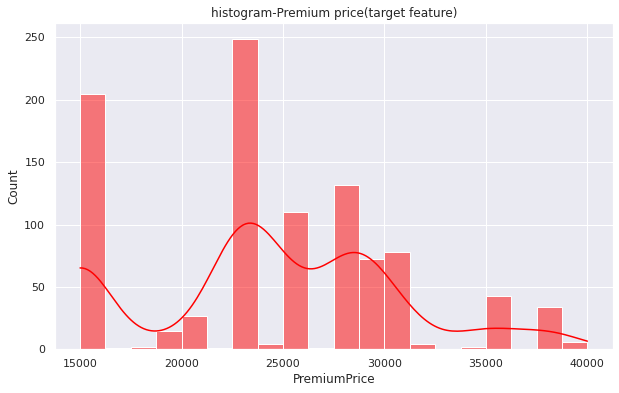

In [14]:
#distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(x='PremiumPrice', data=df, bins=20, kde=True, color='red').set(title = 'histogram-Premium price(target feature)')
plt.show()


We can see that our dependent variable is not following normal distribution.

How all these features are correlated?

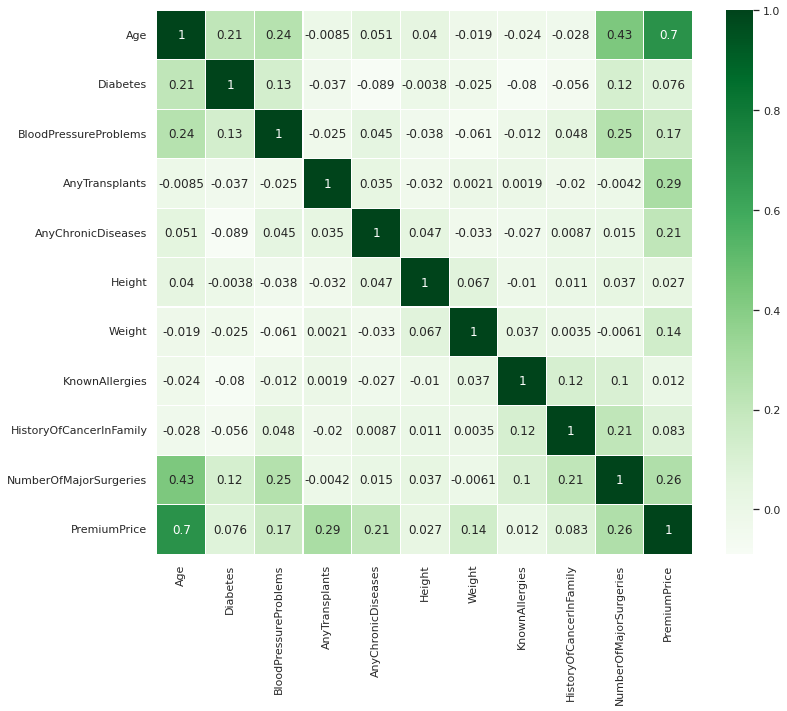

In [15]:
corr=df.corr(method='pearson') # for getting the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,linewidths=.1,cmap="Greens")


From the above heatmap we cannot see any variables having high correlation between other(>8).
<p>But from here we can see that age is having comparetively high correlation with the premium price </p>
<p> and also if we look further there is a small positive correlation between premium price and factors such as anytransplants, anychronicdiseases and no.ofmajorsurgeries </p>
<p> we can also see a positive correlation between age and variables such as dibetes, bloodpressure problem and no. of major surgeries.</p>


<p> Age, anytransplants, anychronicdiseases, noofmajorsurgeries major surgeries are important featues comparetive to others</p>

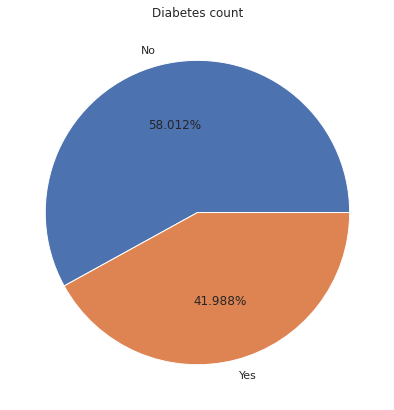

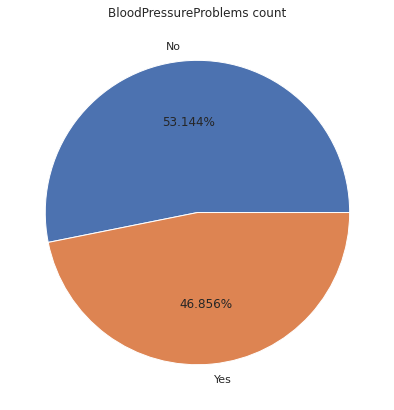

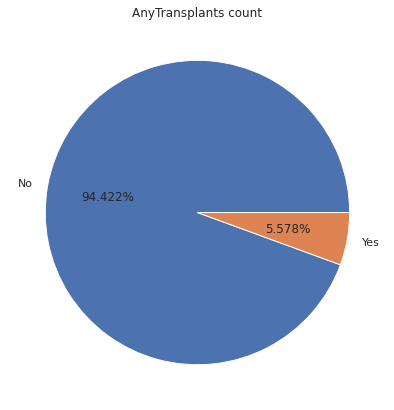

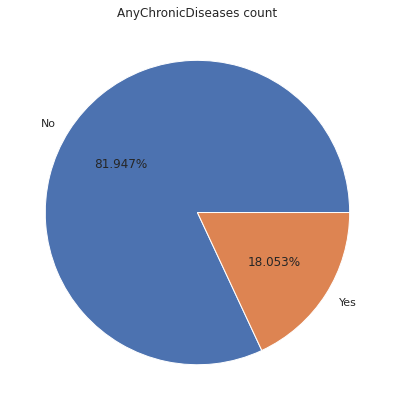

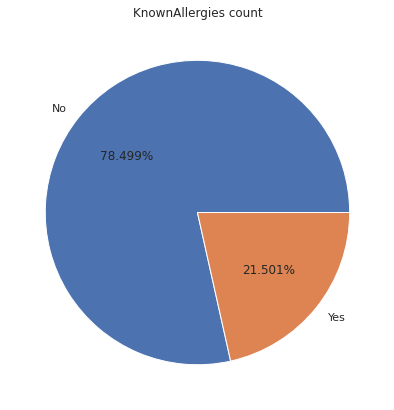

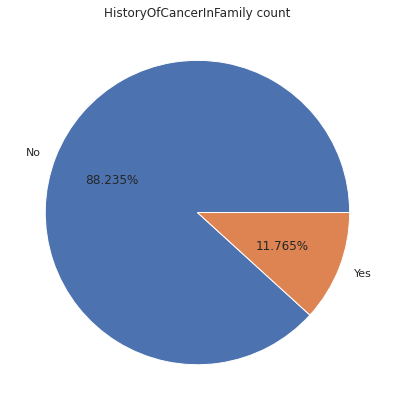

In [16]:
mycountlist = ['Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily']
for i in mycountlist: #loop for creating countplot of the above listed features
  print('\n')
  plt.figure(figsize=(10,7))
  plt.pie(df[i].value_counts(),labels=['No','Yes'],autopct='%1.3f%%')
  plt.title(f"{i} count")
  plt.show()
  


<b>Intrepreting graph 1.</b>
<p>About 58.012% of the total data are not having diabetes and 48.9% is having diabetes</p>
<b>Intrepreting graph 2.</b>
<p>Around 53.14% are not having any blood pressure problems. and 46.85% with bp issues</p>
<b>Intrepreting graph 3.</b>
<p>We only have few records of individuals who undergoes some kind of transplants ie, only about 5.57%. Rest all (97.422) are doesn't undergoes any transplant </p>
<b>Intrepreting graph 4.</b>
<p>here we have 81.94% of records with chronic disease and 18.053% without any chronic disease.</p>
<b>Intrepreting graph 5.</b>
<p> Out of total records 78.49% is not having any known allergy and only       21.50% is having some sort of known allergy.</p>
<b>Intrepreting graph 6.</b>
<p>Around 88.235% is not having any cancer history in their family and 11.76% with cancer history in the family.</p>

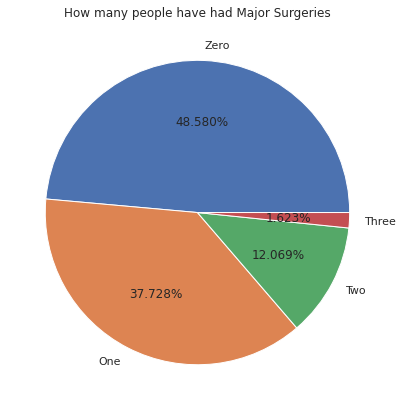

In [17]:
plt.figure(figsize=(10,7)) 
plt.pie(df.NumberOfMajorSurgeries.value_counts(),labels=['Zero','One','Two','Three'],autopct='%1.3f%%') 
plt.title("How many people have had Major Surgeries")
plt.show()


<b> Interpreting the figure</b>
<p> Most of the data belongs to those who donot have any surgery. And we have only few records of those who undergoes 3 surgeries</p>

#### Now We need to analyse how each of these factors are affecting the premium price

<b> How age is related to premium price </b>

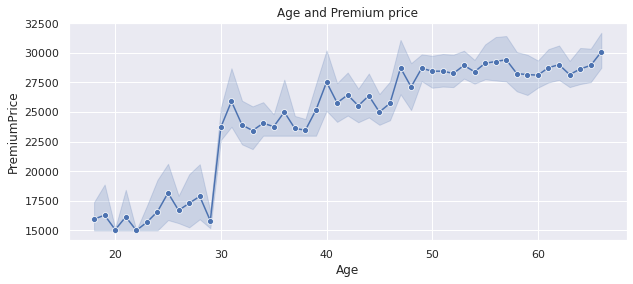

In [18]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df,x="Age",y="PremiumPrice",marker='o').set(title="Age and Premium price") #lineplot showing age and premium price
plt.show()


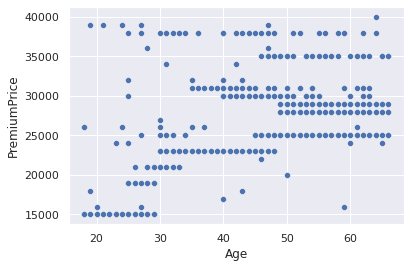

In [19]:
sns.scatterplot(x='Age',y='PremiumPrice',data=df)


From the above scatterplot and lineplot even though there are some points clustering everywhere we can see that the higher premium values are selected by the people in elder age groups. ie, here we can see a trend that, as the age increases the premium value is mostly high.
<p>Most of the people between 18 to 30 years pays a premium of 15000. Few people between age 25 to 30 years pays a premium of around 19000. And so on for different Age range.</p>


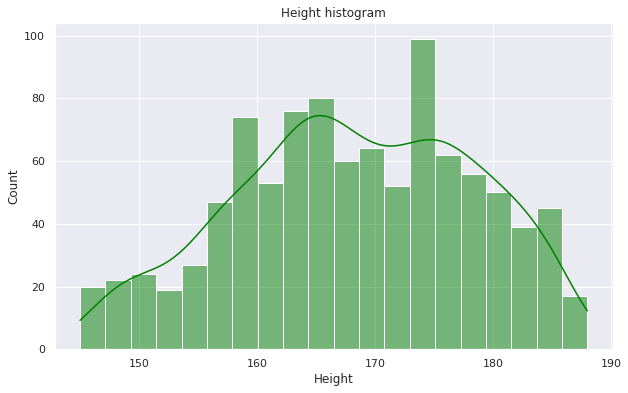

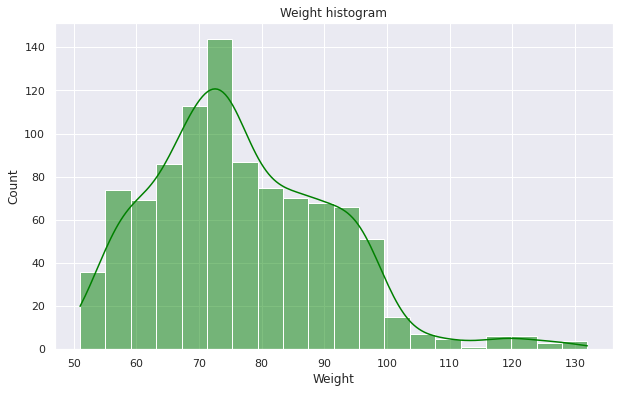

In [20]:
hnw =['Height','Weight']
for i in hnw: # loop for creating gistogram of height and weight
  print('\n')
  plt.figure(figsize=(10, 6))
  sns.histplot(x=i, data=df, bins=20, kde=True, color='green').set(title = f'{i} histogram')
  plt.show()
 

From the above two graphs we can see that  most people height is >160 and weight is <100. We got a skewed distribution for both height and weight

Other than Age, the premium amount is having comparatively high correlation between No. of surgeries, Any transplant and any chronic disease. So lets analyse them.

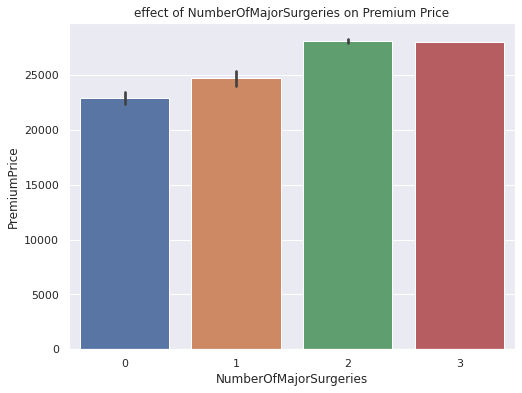

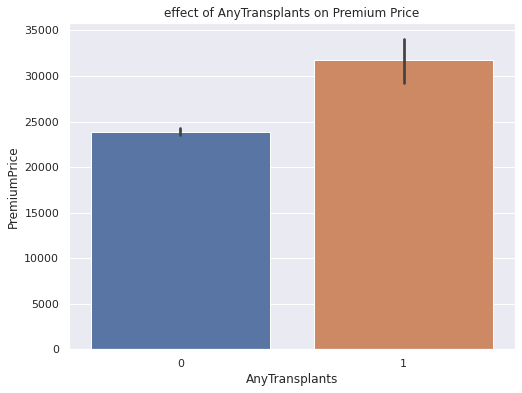

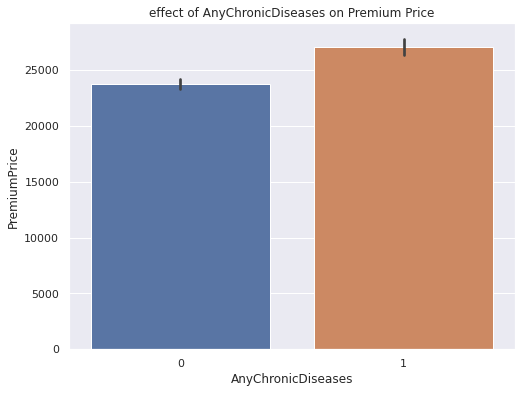

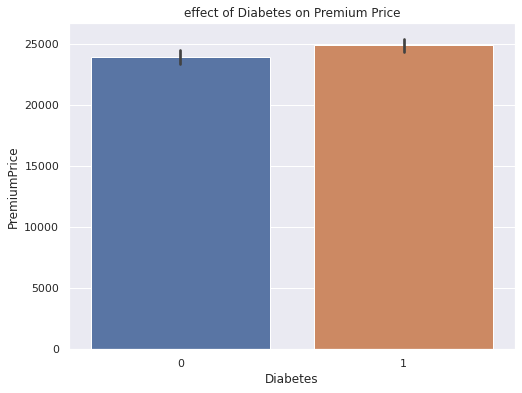

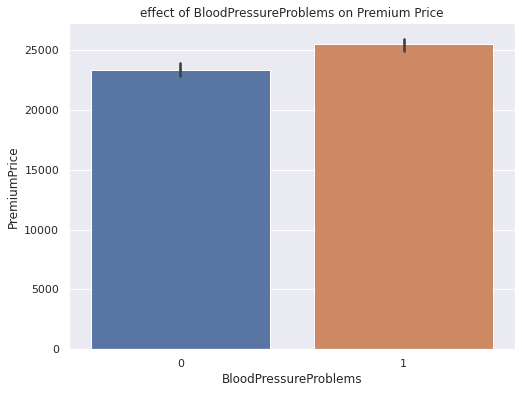

In [21]:
# plotting the relation between all the other factors which is having high corelation with premium price and premium price
a = ['NumberOfMajorSurgeries','AnyTransplants','AnyChronicDiseases','Diabetes','BloodPressureProblems']
for i in a:
  mybarplot(bartitle=f'effect of {i} on Premium Price',xvalue=i,yvalue='PremiumPrice',bdata=df)
  

<p><b> Analysing first figure </b></p>
<p>There is no much difference in premium amount with the increase in no of surgery. But we can see a slight increase in the premium amount when the no of major surgeries increase from 0 to 1. and 1 to 2. But when it comes to 3, we cannot see any increase in the premium amount.
Anyway we can say that, the premium price is higher for those who undergoes any surgery.</p>

<p><b> Analysing secong image </b></p>
<p>Here we can see that the person with any transplants are paying more than the peson don't having any transplant. </p>

<p><b> Analysing third figure </b></p>
<p>Here also the person having any chronic disease is paying more than the person without any chronic disease</p>
<b> Analysing figure 4 and 5 </b>
<p>Here we cannot see any huge difference in avg premium amount for person having diabetes or bp and person without having this</p>


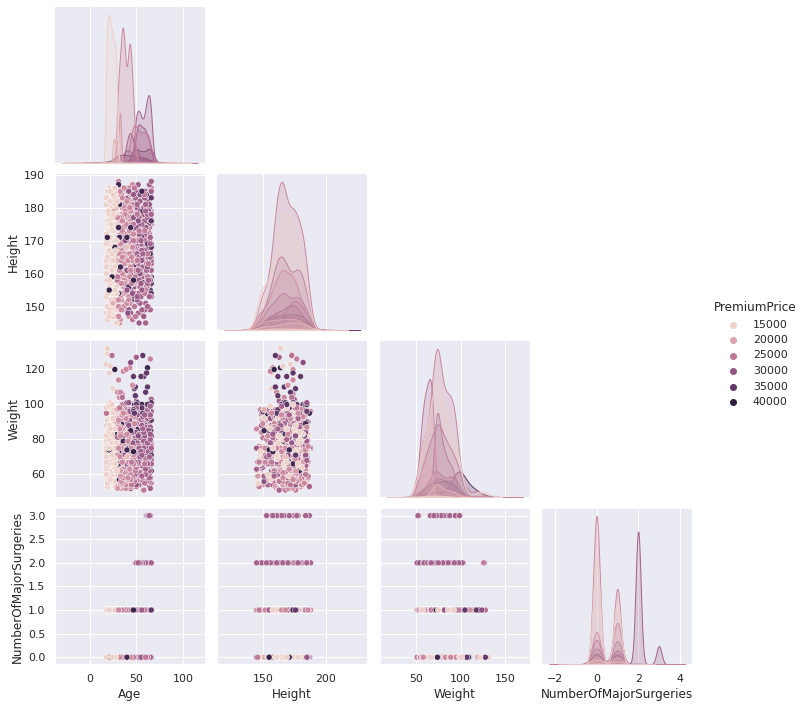

In [22]:
data = ['Age','Height','Weight','NumberOfMajorSurgeries']
sns.pairplot(df,vars = data,hue='PremiumPrice',corner=True) # drawing pairplot for numerical value, but no. of surgery also included..


<b>Now some of the features are having good correlation between age lets analyse that.</b>

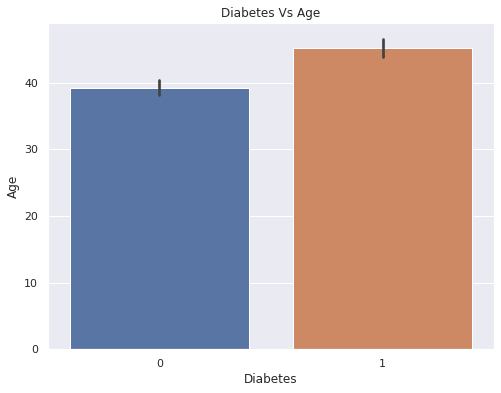

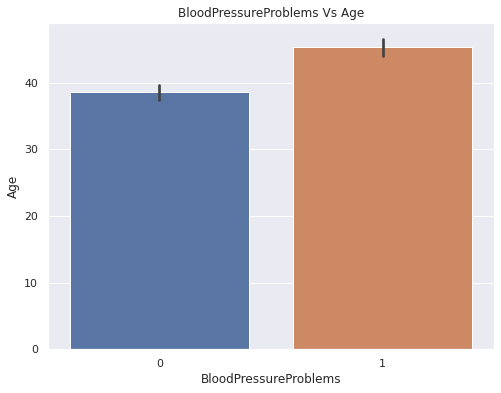

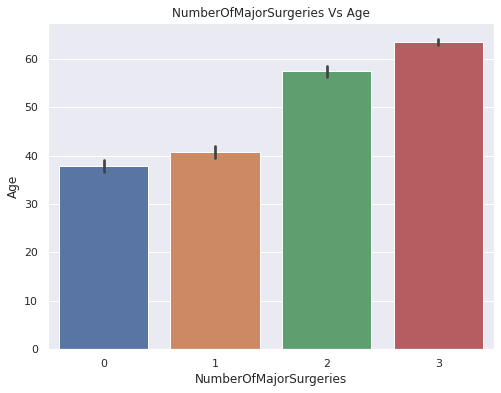

In [23]:
agerel = ['Diabetes','BloodPressureProblems','NumberOfMajorSurgeries']
for i in agerel: #loop for calling the function used for creating barplot
  mybarplot(bartitle=f'{i} Vs Age',xvalue=i,yvalue='Age',bdata=df)
  

<b>Intrepreting fig 1.</b>
<p>From the  the figure visualising the diabetes and the age we can see that the chance of getting diabetics is higher as the age increases.we can see that the avg age of person without diabetes is < 40  and avg age of person having diabetes is > 40</p>
<b>Intrepreting fig 2.</b>
<p>from the figure visualising the blood pressure and age we can see that the avg age of the person who is having blood pressure is higher than that of avg age of the person who is not having the bp. </p>
<b>Intrepreting fig 3.</b>
<p>From the figure visualising the number of surgeries and the age here also we can see that the increased no of surgery is higher for the people having high age</p> 

### <b>Machine learning</b>

###### Getting Features and target datasets

In [24]:
x=df.drop('PremiumPrice',axis=1) #removing dependent variable from the dataset  
y=df['PremiumPrice'] # target feature

In [25]:
numeric_features = ['Age','Height','Weight']

##### <b>Scalling the dataset</b>
Since we have some numerical values like Age, height and weight we need to scale them for the better performance of the model.
Since, our model is not following a normal distribution I am using the Normalisation technique for feature scaling

In [26]:
scaler=MinMaxScaler().fit(x[numeric_features]) # Normalisation technique
x[numeric_features]=scaler.transform(x[numeric_features])

In [27]:
#we are getting better result using minmaxscaler
'''#before doing this do the steps from splitting to target and feature to identifying the num features
scalar =  StandardScaler().fit(x[numeric_features]) # Standardisation technique
x[numeric_features]=scalar.transform(x[numeric_features])'''

'#before doing this do the steps from splitting to target and feature to identifying the num features\nscalar =  StandardScaler().fit(x[numeric_features]) # Standardisation technique\nx[numeric_features]=scalar.transform(x[numeric_features])'

##### <b>Splitting the dataset to training and test data</b>

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 8) # random_state is for fixing the splitting

##### <b>Model Selection</b>

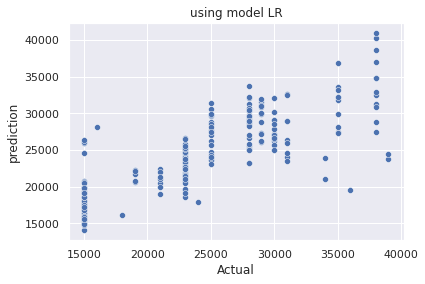

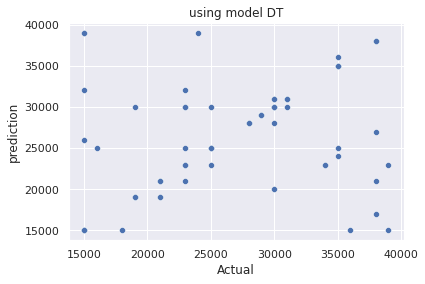

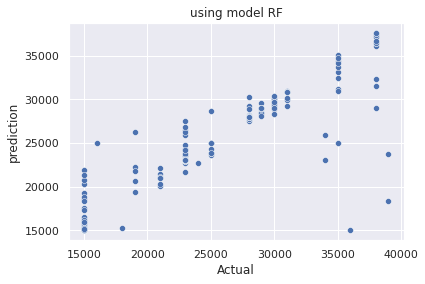

In [29]:
# trying to select best mosel from random forest, linear regression and decisiontree
models=[('LR',LinearRegression()),('DT',DecisionTreeRegressor()),('RF',RandomForestRegressor())]
scores=[]

for name,model in models:
  model.fit(x_train,y_train) # fitting training data with each model
  preds=model.predict(x_test) #predicting test data with each model
  score=explained_variance_score(preds,y_test)
  r2score=r2_score(y_test,preds)
  sns.scatterplot(x=y_test,y=preds).set(title=f'using model {name}')  # plotting the scatter plot for actual value and prediction in each model
  plt.xlabel("Actual")
  plt.ylabel("prediction")
  plt.show()
  scores.append([name,score,r2score]) # attaching details of each model for future reference

Here, we can see that, the scatter plot using Random forest have more closeness between the actual and predicted values. So, we can choose Random forest.

In [30]:
scores_df=pd.DataFrame(scores,columns=['Name','Score','r2score']) # converting the scores list to dataset for easy view
scores_df.sort_values('Score',ascending = False)

,Name,Score,r2score
2,RF,0.748176,0.812104
1,DT,0.534850,0.565518
0,LR,0.449614,0.659719


Here also we  can see that random forest is having highest r2 score and the explained_variance_score. So we are choosing Random forest. we are getting good result with normal scaling

##### <b>Prediction using Random forest </b>

In [31]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
preds=RF.predict(x_test)

In [32]:
preds # our predicted values using random forest

array([28000., 25000., 15260., 16120., 36710., 19560., 29690., 29430.,
       23060., 23000., 28000., 29020., 34750., 24960., 27990., 15260.,
       23000., 19080., 20820., 15020., 15230., 23640., 28000., 23000.,
       23420., 24800., 28840., 27710., 27390., 15650., 15240., 28000.,
       21560., 23020., 28920., 15000., 15720., 15950., 19540., 15000.,
       20120., 27950., 15930., 20340., 23000., 15240., 34230., 27980.,
       15150., 28950., 28440., 23000., 24150., 29720., 30350., 15050.,
       33700., 15950., 25000., 33200., 23000., 23060., 17880., 16370.,
       23920., 15380., 23000., 23000., 23000., 25000., 25000., 28870.,
       25000., 34850., 23000., 36510., 27930., 28000., 23000., 30980.,
       25000., 28120., 23840., 23000., 28000., 15000., 28030., 28070.,
       36280., 15040., 28560., 31810., 23480., 25000., 15470., 25610.,
       23040., 31370., 29480., 26900., 30550., 23260., 27560., 25000.,
       29400., 23000., 28030., 25000., 29730., 23020., 23260., 15000.,
      